In [2558]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
le = LabelEncoder()
df = pd.read_csv('breast-cancer.csv')

In [2559]:
df.rename(columns={'class': 'recurrence_events'}, inplace = True)
df.rename(columns={'tumor-size': 'tumor_size'}, inplace = True)
df.rename(columns={'inv-nodes': 'inv_nodes'}, inplace = True)
df.rename(columns={'node-caps': 'node_caps'}, inplace = True)
df.rename(columns={'deg-malig': 'deg_malig'}, inplace = True)
df.rename(columns={'breast-quead': 'breast_quead'}, inplace = True)


In [2560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   recurrence_events  286 non-null    object
 1   age                286 non-null    object
 2   menopause          286 non-null    object
 3   tumor_size         286 non-null    object
 4   inv_nodes          286 non-null    object
 5   node_caps          286 non-null    object
 6   deg_malig          286 non-null    int64 
 7   breast             286 non-null    object
 8   breast_quead       286 non-null    object
 9   irradiat           286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [2561]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
#print(df["deg_malig"].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


In [2562]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
#print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


In [2563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   recurrence_events  286 non-null    object
 1   age                286 non-null    object
 2   menopause          286 non-null    object
 3   tumor_size         286 non-null    object
 4   inv_nodes          286 non-null    object
 5   node_caps          286 non-null    object
 6   deg_malig          286 non-null    int64 
 7   breast             286 non-null    object
 8   breast_quead       286 non-null    object
 9   irradiat           286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [2564]:
df['recurrence_events'] = le.fit_transform(df['recurrence_events'])
df["age"] = le.fit_transform(df['age'])
df['menopause'] = le.fit_transform(df['menopause'])
df["tumor_size"] =le.fit_transform(df['tumor_size'])
df["inv_nodes"] = le.fit_transform(df['inv_nodes'])
df['node_caps'] = le.fit_transform(df['node_caps'])
df["deg_malig"] = le.fit_transform(df['deg_malig'])
df['breast'] = le.fit_transform(df['breast'])
df['breast_quead'] = le.fit_transform(df['breast_quead'])
df["irradiat"] = le.fit_transform(df['irradiat'])

In [2565]:
# Imputar los valores faltantes ('?') en la columna "breast_quead" con la moda
mode = df['breast_quead'].mode()[0]
df['breast_quead'] = df['breast_quead'].replace('?', mode)

In [2566]:
# Imputar los valores faltantes ('?') en la columna "breast_quead" con la moda
mode = df['node_caps'].mode()[0]
df['node_caps'] = df['node_caps'].replace('?', mode)

In [2567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   recurrence_events  286 non-null    int32
 1   age                286 non-null    int32
 2   menopause          286 non-null    int32
 3   tumor_size         286 non-null    int32
 4   inv_nodes          286 non-null    int32
 5   node_caps          286 non-null    int32
 6   deg_malig          286 non-null    int64
 7   breast             286 non-null    int32
 8   breast_quead       286 non-null    int32
 9   irradiat           286 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 12.4 KB


In [2568]:
print(df['recurrence_events'].unique())  
print(df["age"].unique()) 
print(df['menopause'].unique())  
print(df["tumor_size"].unique())  
print(df["inv_nodes"].unique())  
print(df['node_caps'].unique())  
print(df['breast'].unique()) 
print(df['breast_quead'].unique()) 
print(df["irradiat"].unique())

[0 1]
[1 2 4 3 5 0]
[2 0 1]
[ 5  3  2  0  4 10  1  7  6  9  8]
[0 5 6 4 2 1 3]
[1 2 0]
[0 1]
[2 5 3 4 1 0]
[0 1]


In [2569]:
#print(df["deg_malig"].unique())
#print(df["deg_malig"] == 1.0)


#edad, menopause, inv_nodes, node_caps

df.drop(['deg_malig'], axis = 1, inplace= True)
df.drop(['tumor_size'], axis = 1, inplace= True)
df.drop(['age'], axis = 1, inplace= True)
df.drop(['inv_nodes'], axis = 1, inplace= True)
df.drop(['breast'], axis = 1, inplace= True)
df.drop(['breast_quead'], axis = 1, inplace= True)
df.drop(['irradiat'], axis = 1, inplace= True)

In [2570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   recurrence_events  286 non-null    int32
 1   age                286 non-null    int32
 2   menopause          286 non-null    int32
 3   tumor_size         286 non-null    int32
 4   inv_nodes          286 non-null    int32
 5   node_caps          286 non-null    int32
 6   deg_malig          286 non-null    int64
 7   breast             286 non-null    int32
 8   breast_quead       286 non-null    int32
 9   irradiat           286 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 12.4 KB


In [2571]:
# Codificar las variables categóricas

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

In [2572]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df_encoded.drop("recurrence_events", axis=1)
y = df_encoded["recurrence_events"]

In [2573]:
corr = df.corr()

In [2574]:
import seaborn as sns

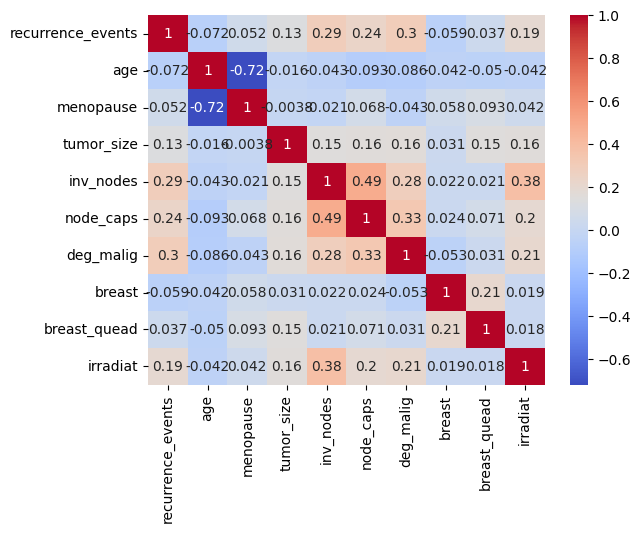

In [2575]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

edad, menopause, inv_nodes, node_caps

In [2576]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [2577]:
# Crear una instancia del clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=7)  # Puedes ajustar el valor de k según tus necesidades

In [2578]:
# Entrenar el clasificador k-NN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [2579]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)


In [2580]:
# Evaluar el rendimiento del clasificador
accuracy = knn.score(X_test, y_test)
print("Exactitud (Accuracy):", accuracy)

Exactitud (Accuracy): 0.7391304347826086
